[TOC]

# C8 Plotting and Visualization(绘图和可视化)

In [24]:
import numpy as np
import pandas as pd
from numpy.random import randn
from pandas import Series, DataFrame
import os
import matplotlib.pyplot as plt

In [25]:
%matplotlib inline

In [26]:
%pwd

'C:\\workspace\\pydata\\ch08'

In [27]:
%cd .\pydata\ch08

[WinError 3] 系统找不到指定的路径。: './pydata/ch08'
C:\workspace\pydata\ch08


In [28]:
%gui

### 以前学过的matplotlib.pyplot 的一些基础

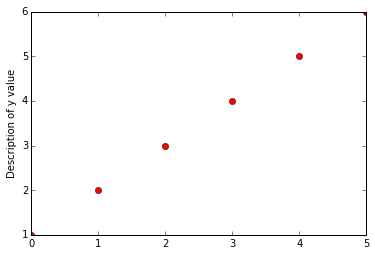

In [29]:
def ex1():
    plt.plot(range(1, 7), 'ro')
    plt.ylabel('Description of y value')
    plt.show()
ex1()

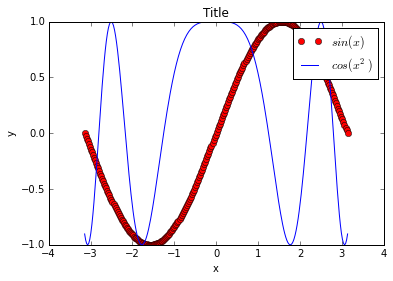

In [30]:
def ex2():
    x = np.linspace(-np.pi, np.pi, 256, endpoint= True)
    c, s = np.cos(x*x), np.sin(x)
    plt.plot(x, s, 'ro', label = '$sin(x)$')
    plt.plot(x, c, label = '$cos(x^2)$')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()  #描述表示每条曲线的标签
    plt.title('Title')
    plt.show()
    
ex2()

## 5.1 A brief matplotlib API primer(matplotlib 入门)

In [31]:
import matplotlib.pyplot as plt

### 5.1.1 Figures and Subplots
matplotlib的图像都位于Figure对象中， plt.figure创建一个新的Figure

In [32]:
fig = plt.figure()
# plt.figure()的选项 figsize 确保当图片保存到磁盘时具有一定的大小和纵横比。

In [33]:
# 控figure不能绘图，必须用add_subplot创建一个或多个subplot
ax1 = fig.add_subplot(221)
# 等同 fig.add_subplot(2, 2, 1)

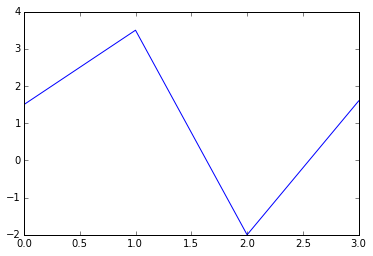

In [34]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot([1.5, 3.5, -2, 1.6])
#plt.plot(randn(50).cumsum(), 'k--')

In [35]:
_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))

In [36]:
plt.close('all')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000041E00B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000011EBEF0>]], dtype=object)

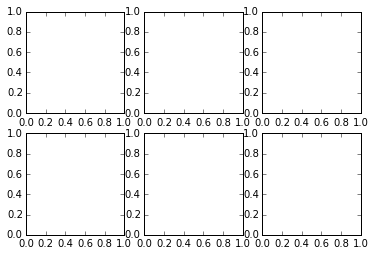

In [37]:
fig, axes = plt.subplots(2, 3)
axes

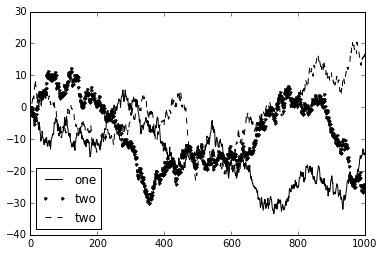

In [38]:
def fig_ex():
	fig = plt.figure()
	ax = fig.add_subplot(111)
	data = randn(1000).cumsum()
	ax.plot(data, 'k', label = 'one')  #不传图label 或者传入 label = '_nolegend'
	ax.plot(randn(1000).cumsum(), 'k.', label = 'two')
	ax.plot(randn(1000).cumsum(), 'k--', label = 'two')
	ax.legend(loc ='best')  # 或者 plt.legend()  loc表示位置 best表示会自动选择最不碍事的位置

fig_ex()

### 5.1.5 Annotations and drawing on a subplot(注解以及在Subplot上绘图)

In [43]:
data = pd.read_csv('spx.csv', index_col = 0, parse_dates = True)
spx = data['SPX']
spx

1990-02-01     328.79
1990-02-02     330.92
1990-02-05     331.85
1990-02-06     329.66
1990-02-07     333.75
1990-02-08     332.96
1990-02-09     333.62
1990-02-12     330.08
1990-02-13     331.02
1990-02-14     332.01
1990-02-15     334.89
1990-02-16     332.72
1990-02-20     327.99
1990-02-21     327.67
1990-02-22     325.70
1990-02-23     324.15
1990-02-26     328.67
1990-02-27     330.26
1990-02-28     331.89
1990-03-01     332.74
1990-03-02     335.54
1990-03-05     333.74
1990-03-06     337.93
1990-03-07     336.95
1990-03-08     340.27
1990-03-09     337.93
1990-03-12     338.67
1990-03-13     336.00
1990-03-14     336.87
1990-03-15     338.07
               ...   
2011-09-02    1173.97
2011-09-06    1165.24
2011-09-07    1198.62
2011-09-08    1185.90
2011-09-09    1154.23
2011-09-12    1162.27
2011-09-13    1172.87
2011-09-14    1188.68
2011-09-15    1209.11
2011-09-16    1216.01
2011-09-19    1204.09
2011-09-20    1202.09
2011-09-21    1166.76
2011-09-22    1129.56
2011-09-23

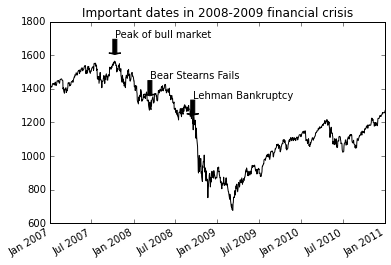

In [48]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(111)

spx.plot(ax = ax, style = 'k-')
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]
for date, label in crisis_data:
    ax.annotate(label, xy=(date,spx.asof(date)+50), 
                         xytext = (date, spx.asof(date) + 200), 
                arrowprops = dict(facecolor = 'black'),
                horizontalalignment = 'left',
                verticalalignment = 'top'
               )
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in 2008-2009 financial crisis')


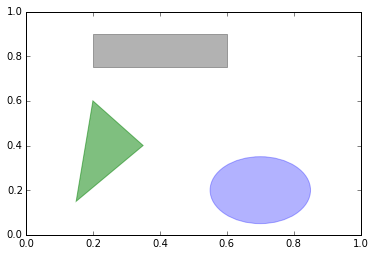

In [49]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### 5.1.6 Saving plots to file

` plt.savefig('figpath.png', dpi = 400, bbox_inches = 'tight')`

### 5.1.7 matplotlib configuration
`plt.rc('figure', figsize=(10, 10))`

## 5.2 Plotting functions in pandas

In [56]:
plt.close('all')

### 5.2.1 line plots

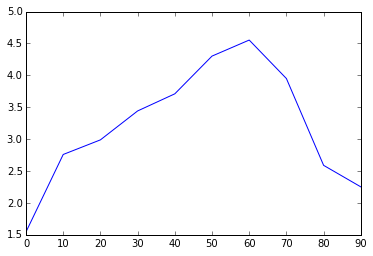

In [53]:
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

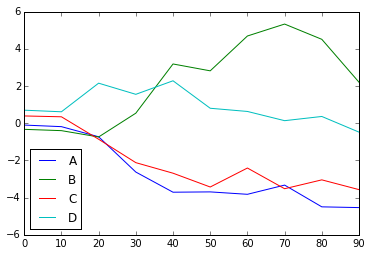

In [55]:
df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))
df.plot()

### 5.2.2 Bar plots(柱状图)

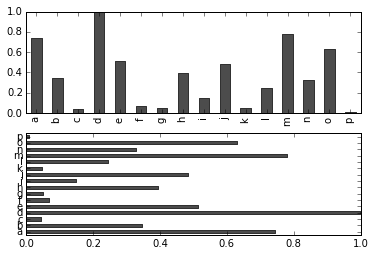

In [59]:
fig, axes = plt.subplots(2, 1)
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

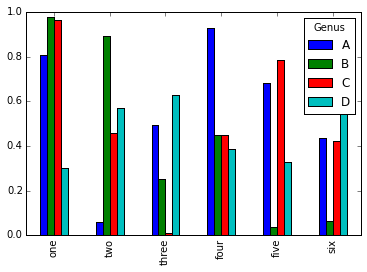

In [61]:
df = DataFrame(np.random.rand(6, 4),
               index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df
df.plot(kind='bar')

In [62]:
plt.figure()

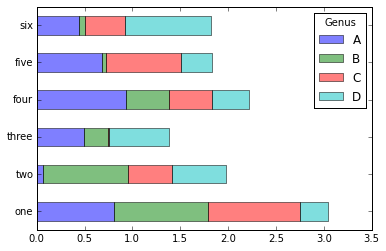

In [70]:
df.plot(kind='barh', stacked=True, alpha=0.5)

### Histograms and density plots

In [96]:
plt.figure()
tips['tip_pct'] = tips['tip'] / tips['total_bill']

In [98]:
macro = pd.read_csv('macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


C:\Python34\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


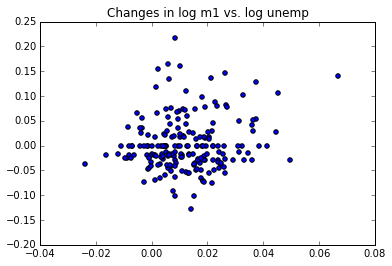

In [99]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B9279B0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000BD104A8>]], dtype=object)

C:\Python34\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


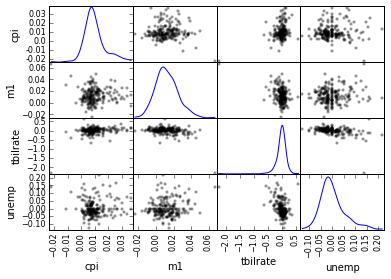

In [100]:
pd.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)